<a href="https://colab.research.google.com/github/sbogde/pandamonium/blob/main/WS03_wkshp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# !pip install wordcloud

In [17]:
import requests
url="https://www.imdb.com/title/tt0060666/reviews/?ref_=tt_ql_urv"
headers = {'User-Agent': 'Mozilla/5.0'}  # Prevent getting blocked
r = requests.get(url, headers=headers)
# Making a GET request


# check status code for response received
# success code - 200
#print(r)

#print content of request
print(r.content)

b'<!DOCTYPE html><html lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><script>if(typeof uet === \'function\'){ uet(\'bb\', \'LoadTitle\', {wb: 1}); }</script><script>window.addEventListener(\'load\', (event) => {\n        if (typeof window.csa !== \'undefined\' && typeof window.csa === \'function\') {\n            var csaLatencyPlugin = window.csa(\'Content\', {\n                element: {\n                    slotId: \'LoadTitle\',\n                    type: \'service-call\'\n                }\n            });\n            csaLatencyPlugin(\'mark\', \'clickToBodyBegin\', 1742751449704);\n        }\n    })</script><title>Manos: The Hands of Fate (1966) - User reviews - IMDb</title><meta name="description" content="Manos: The Hands of Fate (1966) - Movies, TV, Celebs, and more..." data-id="main"/><meta name="keywords" content="Reviews, Showtimes, DV

In [18]:
import requests
from bs4 import BeautifulSoup


# Making a GET request
#r = requests.get('https://www.wlv.ac.uk/')

# check status code for response received
# success code - 200
#print(r)

# Parsing the HTML
soup = BeautifulSoup(r.content, 'html.parser')
print(soup)


<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1742751449704);
        }
    })</script><title>Manos: The Hands of Fate (1966) - User reviews - IMDb</title><meta content="Manos: The Hands of Fate (1966) - Movies, TV, Celebs, and more..." data-id="main" name="description"/><meta content="Reviews, Showtimes, DVDs, Photos, Message Boards, User Ratings, Synopsi

In [19]:
review_containers = soup.find_all('article', class_='sc-8c92b587-1 cwztqu user-review-item')
#print(review_containers)
review_element = review_containers[2].find('div', class_='ipc-html-content-inner-div')
review_text = review_element.get_text(strip=True) if review_element else "No Review"

# Extract rating
rating_element = review_containers[2].find('span', class_='ipc-rating-star--rating')
rating = rating_element.get_text(strip=True) if rating_element else "NA"
print(review_text, "   " , rating)

#https://www.geeksforgeeks.org/python-web-scraping-tutorial/

The leading man is a Frank Zappa lookalike with only a fraction of the talent Zappa (being dead) has.However, the real star of the film, Torgo (a goat-man), performed in some of the best walking-from-one-end-of-the-set-to-another scenes I have seen since 1950s Corman films.Finally, the fights (or are they orgies?) between Manos' wives, which we are asked to believe to be deadly, are utterly hilarious.The MST3K version of this incredibly dreadful bit of late 60s trashola is one of Joel and the Bots' best, but even their antics fail to make this movie wholly tolerable.Rated:  For Insomniacs Only.     1


In [20]:
import csv
import pandas as pd
import time
import warnings

time.sleep(2)
warnings.filterwarnings('ignore')

## Define URLs for Scraping IMDB Reviews

urls = [
    'https://www.imdb.com/title/tt0111161/reviews/?ref_=tt_ql_urv',
    'https://www.imdb.com/title/tt1213644/reviews/?ref_=tt_ql_urv',
    'https://www.imdb.com/title/tt6856242/reviews/?ref_=tt_ql_urv',
    'https://www.imdb.com/title/tt8356942/reviews/?ref_=tt_ql_urv',
    'https://www.imdb.com/title/tt0060666/reviews/?ref_=tt_ql_urv'
]

In [21]:
reviews_list = []
ratings_list = []

# Iterate over each movie URL
for url in urls:
    print(f"Scraping: {url}")
    headers = {'User-Agent': 'Mozilla/5.0'}  # Prevent getting blocked
    page = requests.get(url, headers=headers)

    # Parse the page content
    soup = BeautifulSoup(page.content, 'html.parser')

    # Find all review containers
    review_containers = soup.find_all('article', class_='sc-8c92b587-1 cwztqu user-review-item')

    # Extract review text and rating
    for container in review_containers:
        # Extract review text
        review_element = container.find('div', class_='ipc-html-content-inner-div')
        review_text = review_element.get_text(strip=True) if review_element else "No Review"

        # Extract rating
        rating_element = container.find('span', class_='ipc-rating-star--rating')
        rating = rating_element.get_text(strip=True) if rating_element else "NA"

        # Append to lists
        reviews_list.append(review_text)
        ratings_list.append(rating)

        # print(f"Review: {review_text[:100]}...")  # Print preview
        # print(f"Rating: {rating}\n")

    # Sleep to prevent being blocked
    time.sleep(3)



Scraping: https://www.imdb.com/title/tt0111161/reviews/?ref_=tt_ql_urv
Scraping: https://www.imdb.com/title/tt1213644/reviews/?ref_=tt_ql_urv
Scraping: https://www.imdb.com/title/tt6856242/reviews/?ref_=tt_ql_urv
Scraping: https://www.imdb.com/title/tt8356942/reviews/?ref_=tt_ql_urv
Scraping: https://www.imdb.com/title/tt0060666/reviews/?ref_=tt_ql_urv


In [22]:
print(reviews_list[1], "   ", ratings_list[1])

It is no wonder that the film has such a high rating, it is quite literally breathtaking. What can I say that hasn't said before? Not much, it's the story, the acting, the premise, but most of all, this movie is about how it makes you feel. Sometimes you watch a film, and can't remember it days later, this film loves with you, once you've seen it, you don't forget.The ultimate story of friendship, of hope, and of life, and overcoming adversity.I understand why so many class this as the best film of all time, it isn't mine, but I get it. If you haven't seen it, or haven't seen it for some time, you need to watch it, it's amazing. 10/10.     10


In [23]:
movie = pd.DataFrame({'Review': reviews_list, 'Rating': ratings_list})

# Save to CSV
movie.to_csv('Workshop3_IMDB_Dataset.csv', index=False)

# Display first few rows
print(movie.head())
print(movie.info())

                                              Review Rating
0                                          No Review     10
1  It is no wonder that the film has such a high ...     10
2  I'm trying to save you money; this is the last...     10
3                                          No Review     10
4  This movie is not your ordinary Hollywood flic...     10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  125 non-null    object
 1   Rating  125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB
None


In [24]:
comments=["This is a good film","Interesting film","I do not like film", "Such a wonderful movie","very interesting film",
         "This film is about love story","Do not watch this film","I love this film", "I do not know, I feel it is an interesting film",
         "I like to watch film again", "This film is awesome", "I recommend watching this film to everyone, enjoy it"]


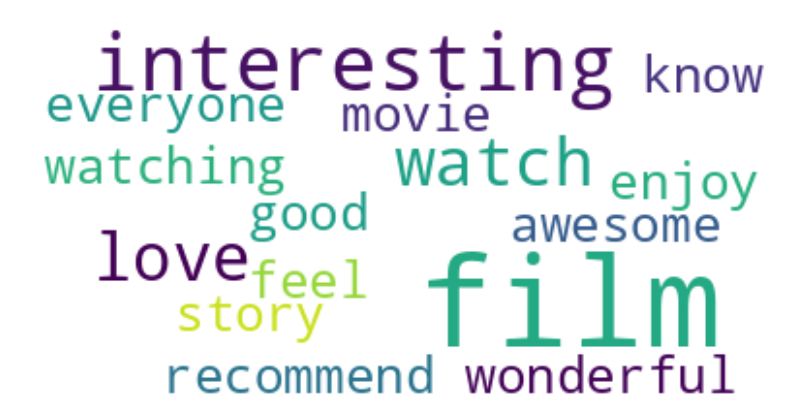

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

text = ', '.join(t for t in comments)
#print(text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

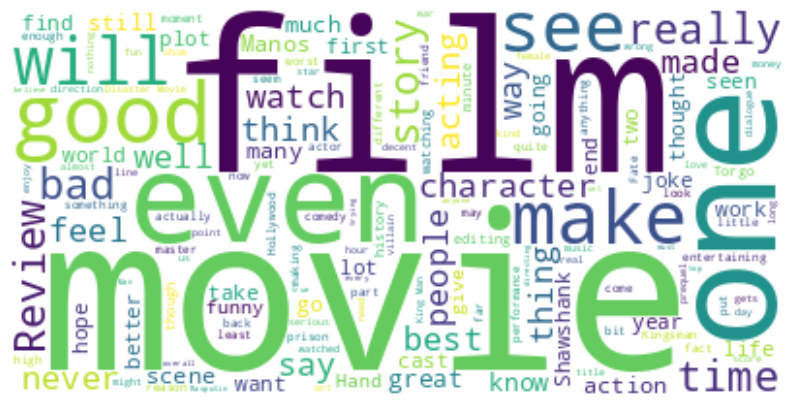

In [26]:
### WordCloud Visualization



text = ', '.join(t for t in movie['Review'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [32]:
#https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/
sid_obj = SentimentIntensityAnalyzer()
sentiment_dict = sid_obj.polarity_scores("It tries to engage the people who are watching it. It tries to suprise people, however, this film is not interesting")
#sentiment_dict = sid_obj.polarity_scores("I love this film. It is wonderful!")
#sentiment_dict = sid_obj.polarity_scores("I am not sure about this film, no idea!")
print("Overall sentiment dictionary is : ", sentiment_dict)
print("Sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
print("Sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
print("Sentence was rated as ", sentiment_dict['pos']*100, "% Positive")

print("Sentence Overall Rated As", end=" ")

    # Decide sentiment as positive, negative, or neutral
if sentiment_dict['compound'] >= 0.05 :
    print("Positive")
elif sentiment_dict['compound'] <= -0.05 :
    print("Negative")
else :
    print("Neutral")

Overall sentiment dictionary is :  {'neg': 0.095, 'neu': 0.803, 'pos': 0.101, 'compound': 0.0366}
Sentence was rated as  9.5 % Negative
Sentence was rated as  80.30000000000001 % Neutral
Sentence was rated as  10.100000000000001 % Positive
Sentence Overall Rated As Neutral


In [ ]:
#use this when you have an offline dataset
#movie =  pd.read_csv("F:\A-universities\WLV\workshop\Workshop3_IMDB_Dataset.csv")
#print(movie.head())
#print(movie.info())

In [33]:
# Convert Rating to string first, then replace non-numeric values safely
movie['Rating'] = pd.to_numeric(movie['Rating'], errors='coerce')
#NaN represents missing or undefined data
# Fill NaN values with a default value (e.g., 0) before converting to integer
movie['Rating'] = movie['Rating'].fillna(0).astype(int)

### Extract Reviews and Ratings
## Text Processing and Analysis
### Importing Required Libraries




In [34]:
# content = []
# for url in urls:
#     page = requests.get(url, timeout=2.50)
#     soup = BeautifulSoup(page.content, 'html.parser')
#     content.append(soup.find_all('div', class_='review-container'))

# Initialize lists to store extracted reviews and ratings
# Create DataFrame

import string
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split


##Sentiment Identification using VADER

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
sentiments = []

for review in movie['Review']:
    score = sid.polarity_scores(review)['compound']
    if score >= 0.05:
        sentiments.append('positive')
    elif score <= -0.05:
        sentiments.append('negative')
    else:
        sentiments.append('neutral')

movie['Sentiment'] = sentiments

## Sentiment Classification using Machine Learning

movie['class-label'] = movie['Rating'].astype(int).apply(lambda x: '1' if x > 5 else ('-1' if x < 5 else '0'))
movie = movie[movie['class-label'] != '0']

#movie.to_csv('f:\myfile1.csv', index=False)
#analyzer is used to set the level of processing, it can be a character or a word level, 'word' or 'char'
#stop_words can provide you with a list of words that have to be removed from the data before calculations;
tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')
#Once you've created a vectorizer instance, it's time to obtain a TF-IDF matrix.
#You can use the fit_transform() class method and shape to print out its dimension:
X = tfidf_vectorizer.fit_transform(movie['Review'])
#print(f"Matrix dimension: {tfidf_matrix.shape}")
print(f"Matrix dimension: {X.shape}")
y = movie['class-label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

## Train and Evaluate SVM Classifier



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Matrix dimension: (121, 3492)


Accuracy: 0.6756756756756757


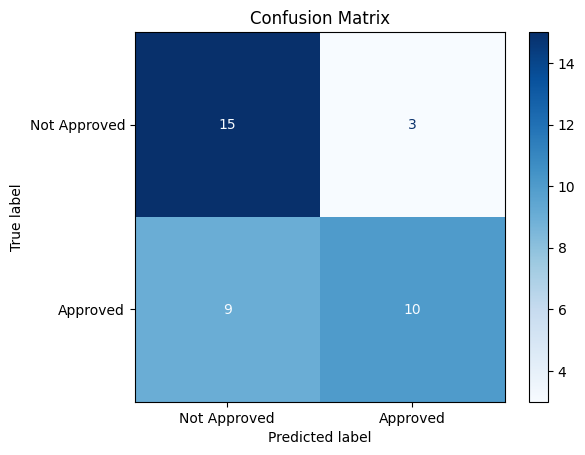

              precision    recall  f1-score   support

          -1       0.62      0.83      0.71        18
           1       0.77      0.53      0.62        19

    accuracy                           0.68        37
   macro avg       0.70      0.68      0.67        37
weighted avg       0.70      0.68      0.67        37



In [35]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Approved", "Approved"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

#print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#How to interprete these metrics?
#https://www.statology.org/sklearn-classification-report/

Accuracy: 0.4594594594594595


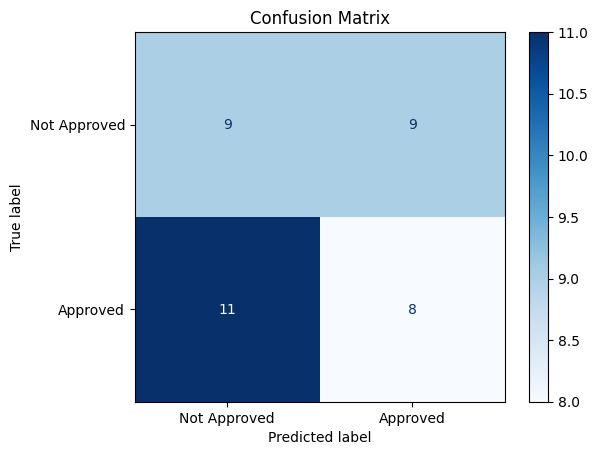

              precision    recall  f1-score   support

          -1       0.45      0.50      0.47        18
           1       0.47      0.42      0.44        19

    accuracy                           0.46        37
   macro avg       0.46      0.46      0.46        37
weighted avg       0.46      0.46      0.46        37



In [36]:
## Train and Evaluate Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Approved", "Approved"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

#print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [37]:
#https://www.kaggle.com/datasets/columbine/imdb-dataset-sentiment-analysis-in-csv-format
#use this when you have an offline dataset
movie1 =  pd.read_csv("F:\A-universities\WLV\workshop\Week 3\IMDB\Valid.csv")
print(movie1.head())
print(movie.info())

FileNotFoundError: [Errno 2] No such file or directory: 'F:\\A-universities\\WLV\\workshop\\Week 3\\IMDB\\Valid.csv'

In [38]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

text = ', '.join(t for t in movie1['text'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'movie1' is not defined

In [ ]:
import string
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split


##Sentiment Identification using VADER

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
sentiments = []

for review in movie1['text']:
    score = sid.polarity_scores(review)['compound']
    if score >= 0.05:
        sentiments.append('positive')
    elif score <= -0.05:
        sentiments.append('negative')
    else:
        sentiments.append('neutral')

movie1['Sentiment'] = sentiments

## Sentiment Classification using Machine Learning


movie1.to_csv('f:\myfile1.csv', index=False)
#analyzer is used to set the level of processing, it can be a character or a word level, 'word' or 'char'
#stop_words can provide you with a list of words that have to be removed from the data before calculations;
tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')
#Once you've created a vectorizer instance, it's time to obtain a TF-IDF matrix.
#You can use the fit_transform() class method and shape to print out its dimension:
X = tfidf_vectorizer.fit_transform(movie1['text'])
#print(f"Matrix dimension: {tfidf_matrix.shape}")
print(f"Matrix dimension: {X.shape}")
y = movie1['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

## Train and Evaluate SVM Classifier



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

# Confusion Matrix
#conf_matrix = confusion_matrix(y_test, y_pred)
#disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Approved", "Approved"])
#disp.plot(cmap='Blues', values_format='d')
#plt.title("Confusion Matrix")
#plt.show()

#print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

#How to interprete these metrics?
#https://www.statology.org/sklearn-classification-report/

In [ ]:

movie1['class-label'] = movie1['Sentiment'].apply(lambda x: 1 if x == "positive" else  0)
count=0
for i in range(0,len(set_2)-1):
    if set_1[i]==set_2[i]:
        count=count+1
print(count/len(set_2))